In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'ADBE', 'TSLA', 'JPM', 'WMT', 'V', 'PG']

In [3]:
stock_dataframes = {}

In [4]:
for symbol in stocks:
    stock = yf.download(symbol, start='2013-01-01', end='2023-01-01')
    stock = stock.reset_index()  # Reset index to get the 'Date' column as a regular column
    stock_dataframes[symbol] = stock

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
stock_dataframes['AAPL'].head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.813854,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.601633,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.139198,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.044264,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.087437,458707200


# ASCENDING TRAINGLE

#### The ascending triangle pattern is a bullish chart pattern that typically forms during an uptrend and consists of two main components: a horizontal resistance line and a rising support line. The pattern is characterized by a series of higher lows (forming the rising support line) and a horizontal line connecting the highs (forming the resistance line).

#### Below code calculates the required parameters for the ascending triangle pattern, namely the resistance and support levels. It uses the rolling window function with a window size of 3 to find the maximum value of the 'High' column within a sliding window and assigns it to the 'Resistance' column. Similarly, it finds the minimum value of the 'Low' column within a sliding window and assigns it to the 'Support' column.
#### The code filters the dataframe to identify the days where the high prices are equal to or higher than the resistance level and the low prices are equal to or lower than the support level. These are the days that exhibit the ascending triangle pattern.

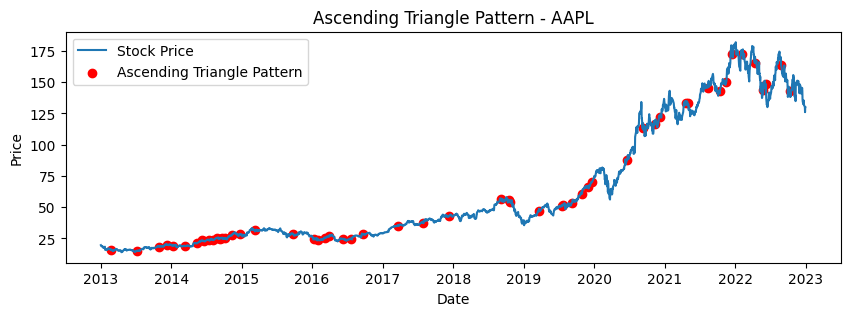

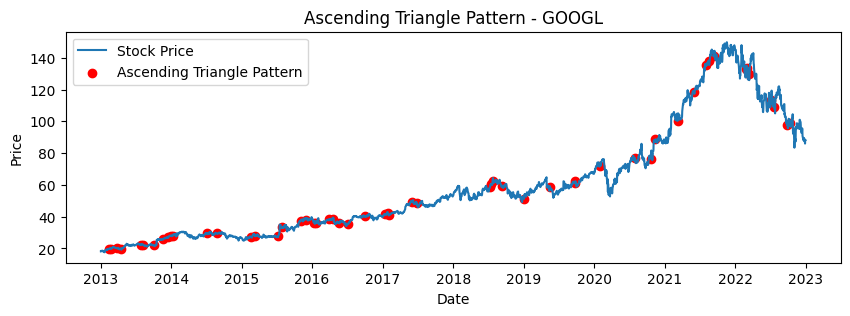

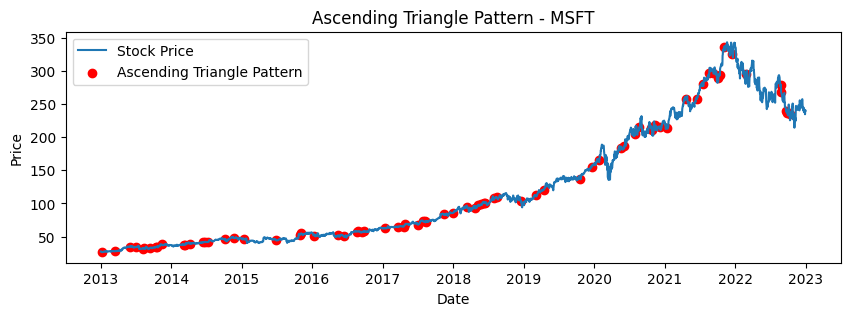

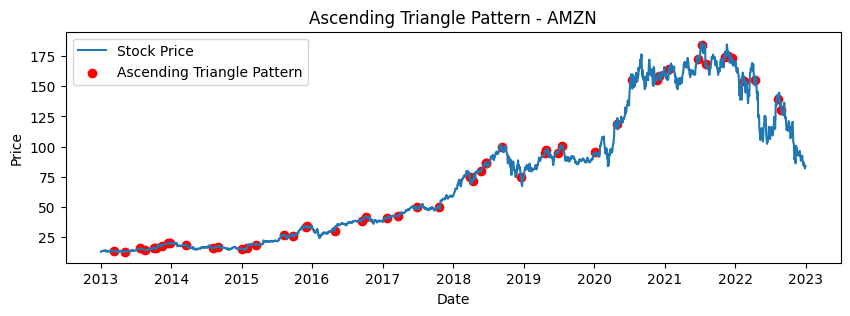

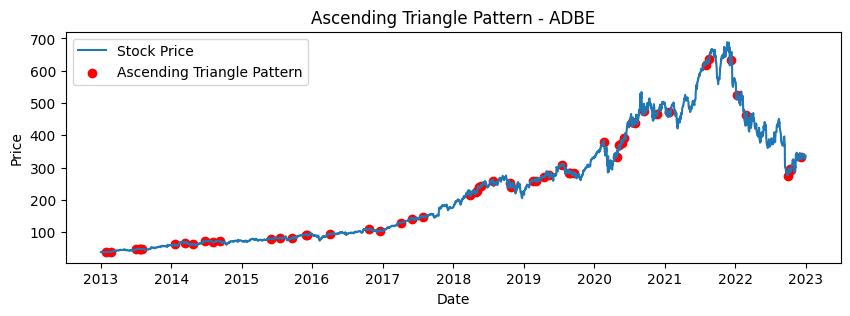

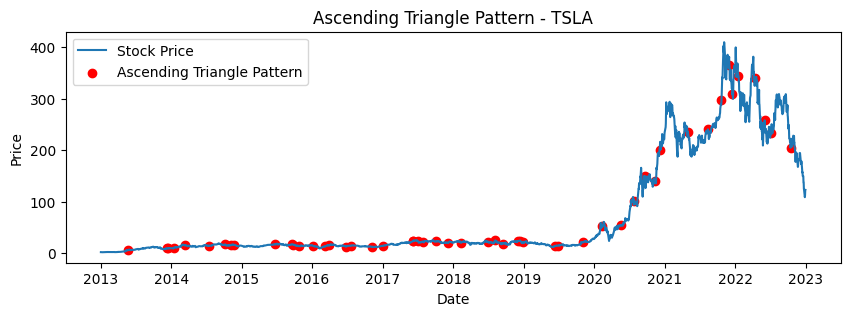

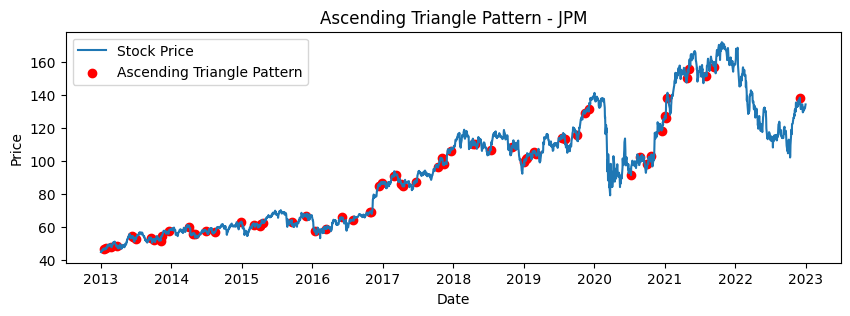

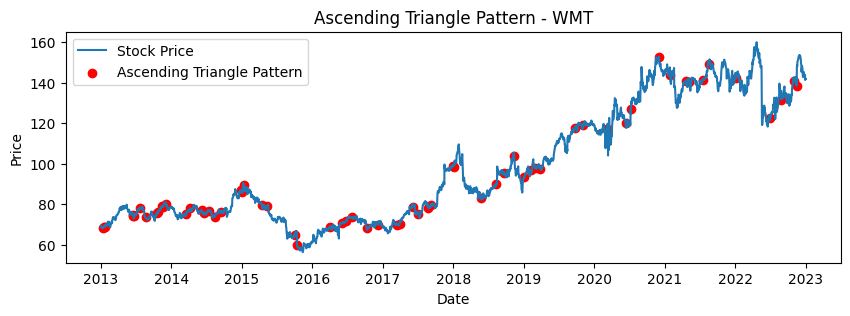

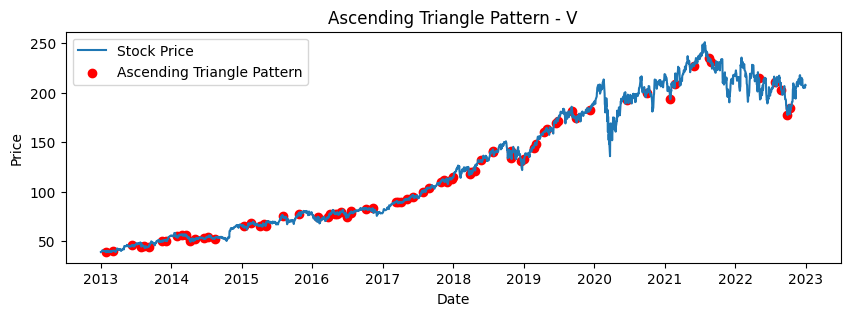

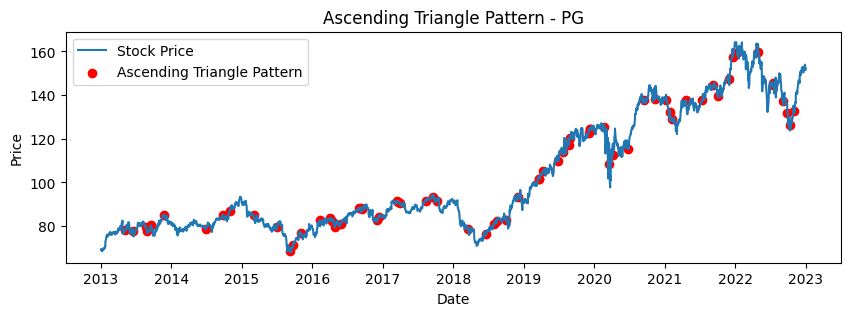

In [6]:
# Iterate over the dictionary and identify the ascending triangle pattern for each stock
for symbol, df in stock_dataframes.items():
    # Check if the 'Date' column is present in the dataframe

    # Adjust the dataframe to include the 'Date' column as the index
    df.set_index('Date', inplace=True)

    # Calculate the required parameters for the ascending triangle pattern
    df['Resistance'] = df['High'].rolling(window=3).max()
    df['Support'] = df['Low'].rolling(window=3).min()

    # Identify the days where the pattern is present
    ascending_triangle_days = df[(df['High'] >= df['Resistance']) & (df['Low'] <= df['Support'])]

    # Plot the ascending triangle pattern
    plt.figure(figsize=(10, 3))
    plt.plot(df.index, df['Close'], label='Stock Price')
    plt.scatter(ascending_triangle_days.index, ascending_triangle_days['Close'], color='red', label='Ascending Triangle Pattern')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Ascending Triangle Pattern - {symbol}')
    plt.legend()
    plt.show()

# Bear Flag

#### The bear flag chart pattern is a continuation pattern observed in technical analysis. It typically forms during a downtrend and indicates that the price is likely to continue falling after a temporary upward consolidation phase. The pattern consists of a downward sloping trendline (flagpole) followed by a smaller upward price movement (flag).

#### The bear flag pattern consists of two main components: the flagpole and the flag.

#### Below the code identifies the key points that define the bear flag pattern. It calculates the highest point (flagpole_high) by finding the index of the maximum value in the 'High' column. It then calculates the lowest point (flagpole_low) by finding the index of the minimum value in the 'Low' column up to the flagpole_high index. The flag_start is set as flagpole_high + 1, indicating the starting point of the flag. The flag_end is calculated as the index of the maximum value in the 'Close' column starting from flag_start, representing the end of the flag.

In [53]:
def plot_bear_flag(symbol, stock_dataframe):
    # Extract necessary columns from the stock dataframe
    dates = stock_dataframe['Date']
    high_prices = stock_dataframe['High']
    low_prices = stock_dataframe['Low']
    close_prices = stock_dataframe['Close']

    # Calculate the flagpole and flag boundaries
    flagpole_high = high_prices.idxmax()
    flagpole_low = low_prices[:flagpole_high].idxmin()
    flag_start = flagpole_high + 1
    flag_end = close_prices[flag_start:].idxmax()

    # Plot the stock price data
    plt.figure(figsize=(10, 3))
    plt.plot(dates, close_prices, label='Close Price')
    plt.plot(dates[flagpole_low:flag_end], close_prices[flagpole_low:flag_end], label='Bear Flag')

    # Plot flagpole and flag boundaries
    plt.axvline(x=dates[flagpole_high], color='r', linestyle='--', linewidth=1.5, label='Flagpole High')
    plt.axvline(x=dates[flagpole_low], color='g', linestyle='--', linewidth=1.5, label='Flagpole Low')
    plt.axvline(x=dates[flag_start], color='b', linestyle='--', linewidth=1.5, label='Flag Start')
    plt.axvline(x=dates[flag_end], color='b', linestyle='--', linewidth=1.5, label='Flag End')

    plt.title(f'Bear Flag Pattern for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

[*********************100%***********************]  1 of 1 completed


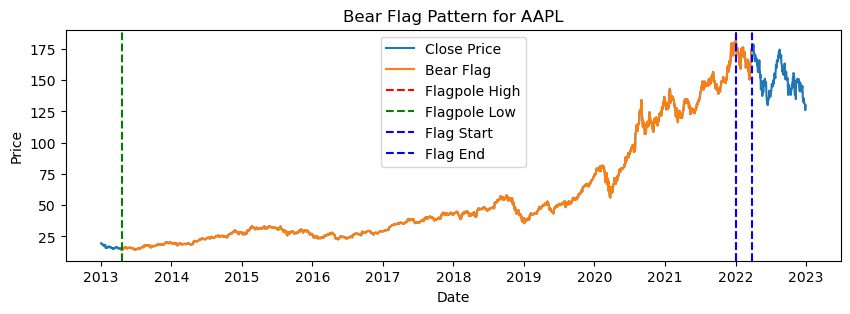

[*********************100%***********************]  1 of 1 completed


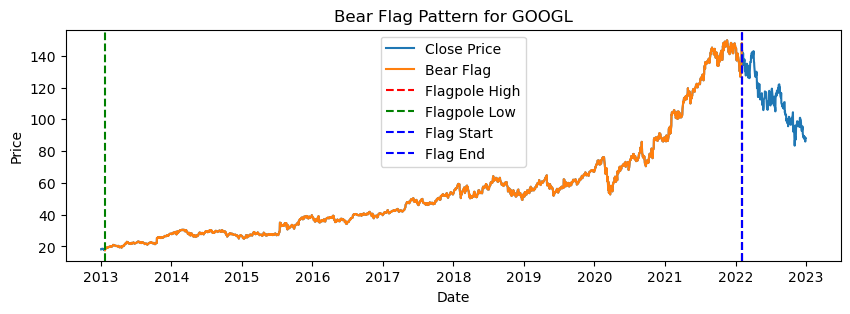

[*********************100%***********************]  1 of 1 completed


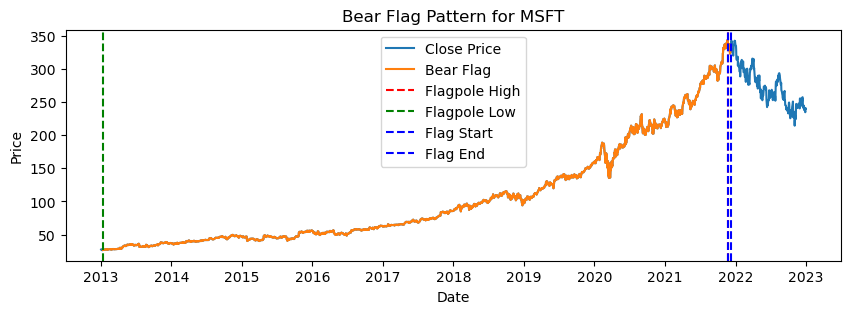

[*********************100%***********************]  1 of 1 completed


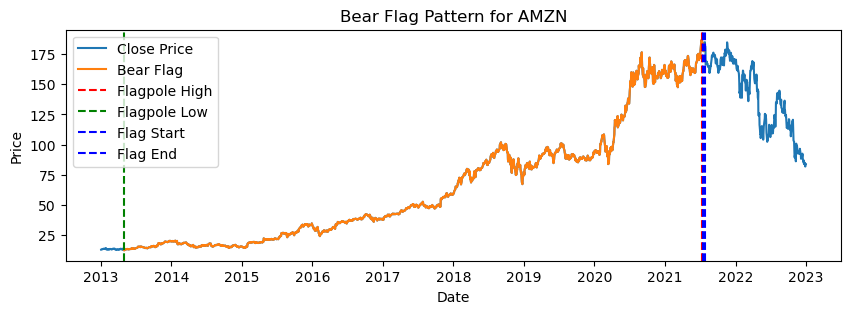

[*********************100%***********************]  1 of 1 completed


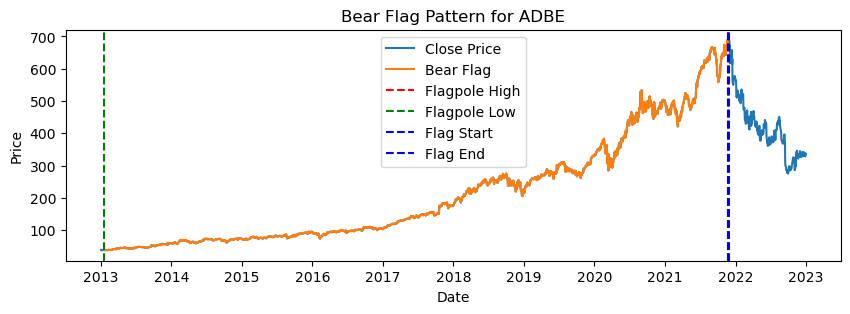

[*********************100%***********************]  1 of 1 completed


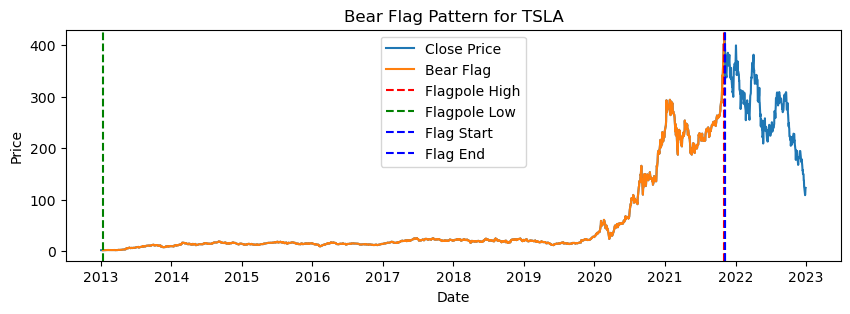

[*********************100%***********************]  1 of 1 completed


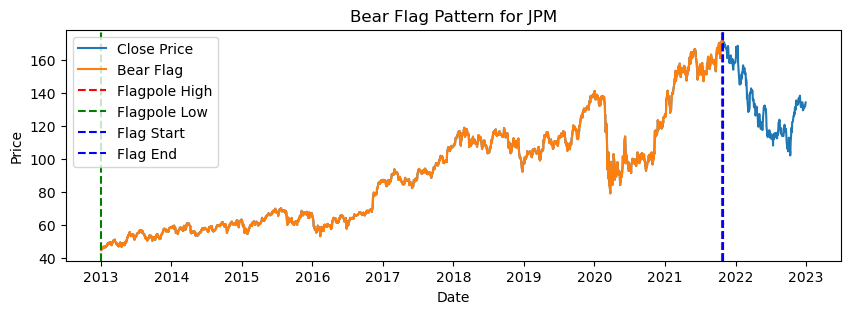

[*********************100%***********************]  1 of 1 completed


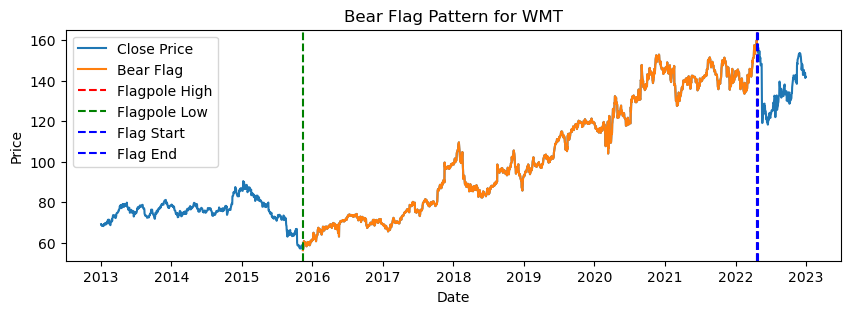

[*********************100%***********************]  1 of 1 completed


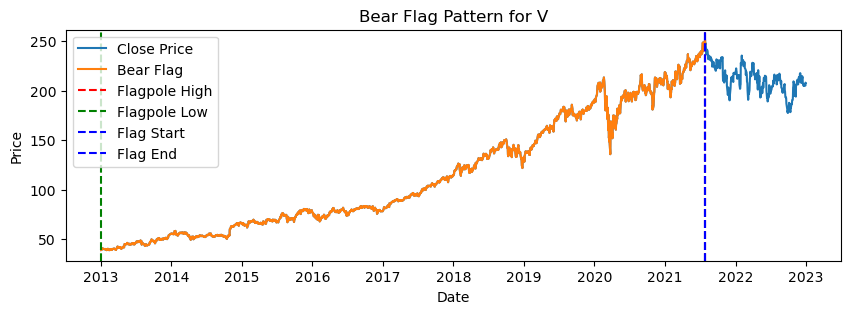

[*********************100%***********************]  1 of 1 completed


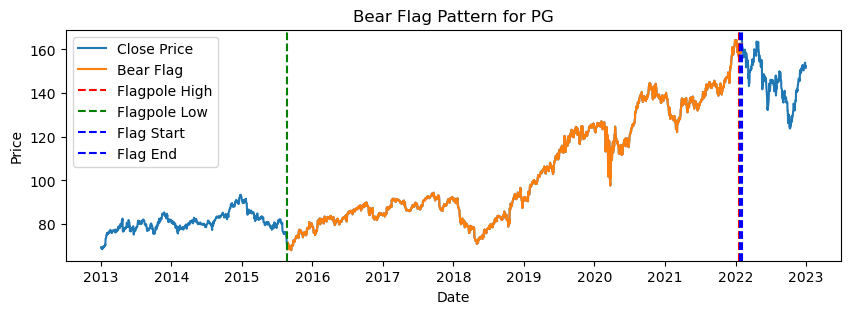

In [54]:
for symbol in stocks:
    stock = yf.download(symbol, start='2013-01-01', end='2023-01-01')
    stock = stock.reset_index()
    stock_dataframes[symbol] = stock
    plot_bear_flag(symbol, stock_dataframes[symbol])

# Cup and handle

#### The cup and handle pattern is a bullish continuation pattern commonly observed in technical analysis of stock charts. It signals a potential upward trend continuation after a temporary consolidation period. The pattern consists of three main parts: the cup, the handle, and the breakout.

#### The cup and handle pattern is divided into two main components: the cup and the handle.

#### The cup is identified by finding the lowest low price (cup_start) and the highest low price (cup_end) within the specified range of dates. This range represents the formation of the rounded bottom of the cup.

#### The handle is the consolidation phase that follows the cup. To identify the start of the handle, handle_start is set as the date immediately following the cup_end.

#### To find the end of the handle, we look for the maximum closing price within the dates following the handle start (handle_start). This gives us handle_end, which represents the end of the handle consolidation phase.

In [55]:
def plot_cup_and_handle(symbol, stock_dataframe):
    # Extract necessary columns from the stock dataframe
    dates = stock_dataframe['Date']
    high_prices = stock_dataframe['High']
    low_prices = stock_dataframe['Low']
    close_prices = stock_dataframe['Close']

    # Calculate the cup and handle boundaries
    cup_start = low_prices.idxmin()
    cup_end = low_prices.idxmax()
    handle_start = cup_end + 1
    handle_end = close_prices[handle_start:].idxmax()

    # Plot the stock price data
    plt.figure(figsize=(10, 3))
    plt.plot(dates, close_prices, label='Close Price')
    plt.plot(dates[cup_start:handle_end], close_prices[cup_start:handle_end], label='Cup and Handle')

    # Plot cup and handle boundaries
    plt.axvline(x=dates[cup_start], color='r', linestyle='--', linewidth=1.5, label='Cup Start')
    plt.axvline(x=dates[cup_end], color='r', linestyle='--', linewidth=1.5, label='Cup End')
    plt.axvline(x=dates[handle_start], color='b', linestyle='--', linewidth=1.5, label='Handle Start')
    plt.axvline(x=dates[handle_end], color='b', linestyle='--', linewidth=1.5, label='Handle End')

    plt.title(f'Cup and Handle Pattern for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

[*********************100%***********************]  1 of 1 completed


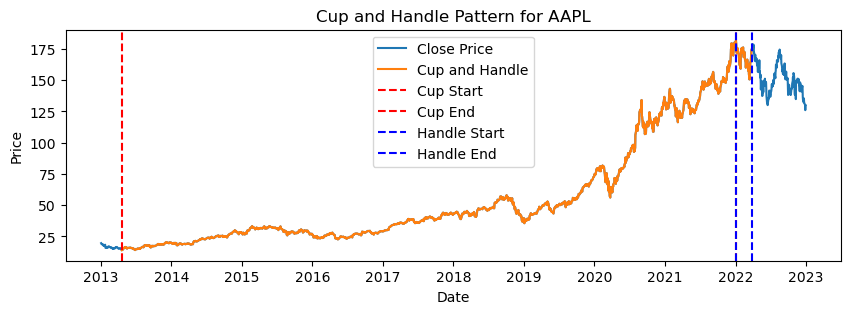

[*********************100%***********************]  1 of 1 completed


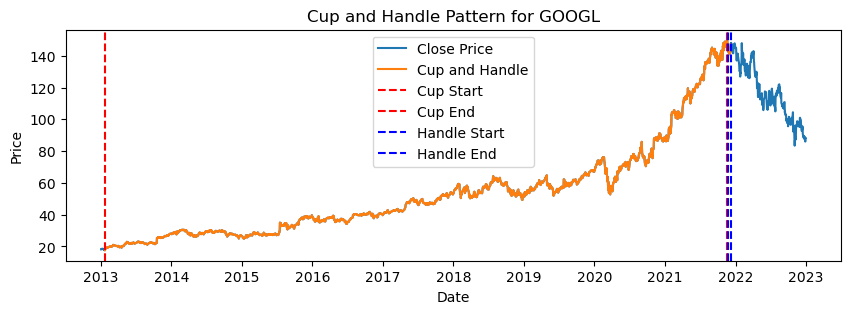

[*********************100%***********************]  1 of 1 completed


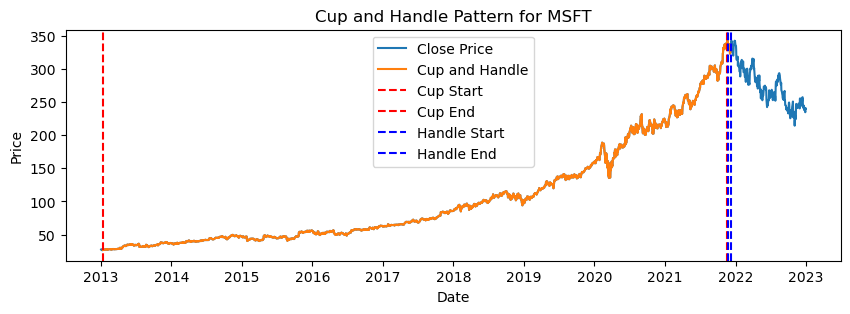

[*********************100%***********************]  1 of 1 completed


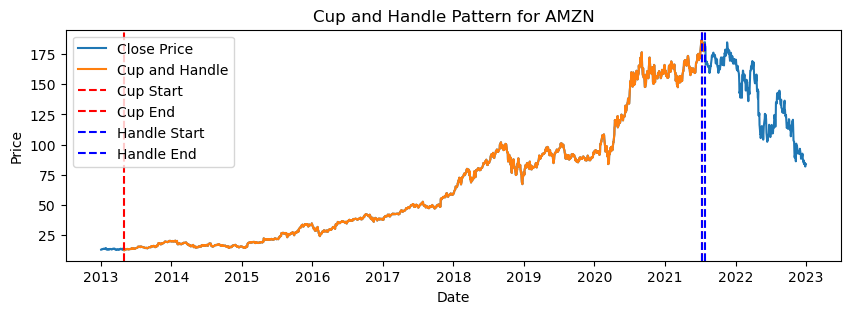

[*********************100%***********************]  1 of 1 completed


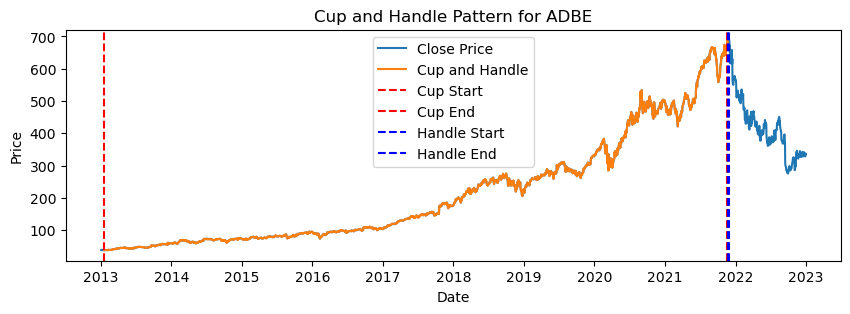

[*********************100%***********************]  1 of 1 completed


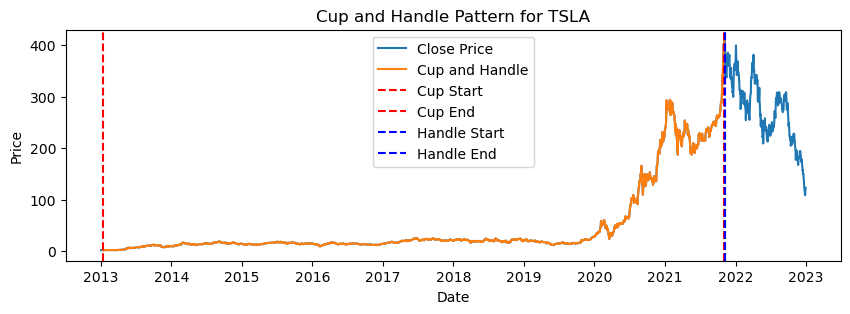

[*********************100%***********************]  1 of 1 completed


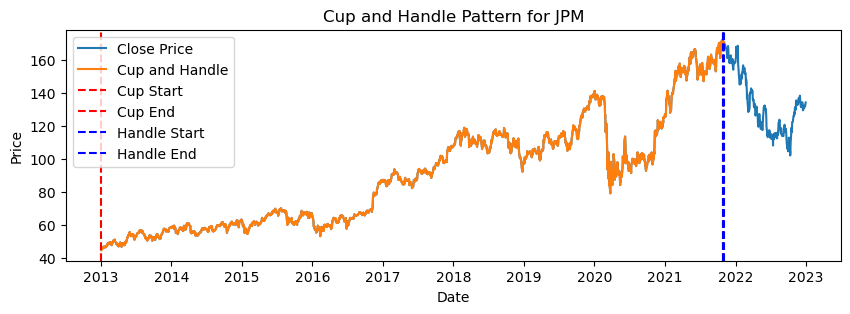

[*********************100%***********************]  1 of 1 completed


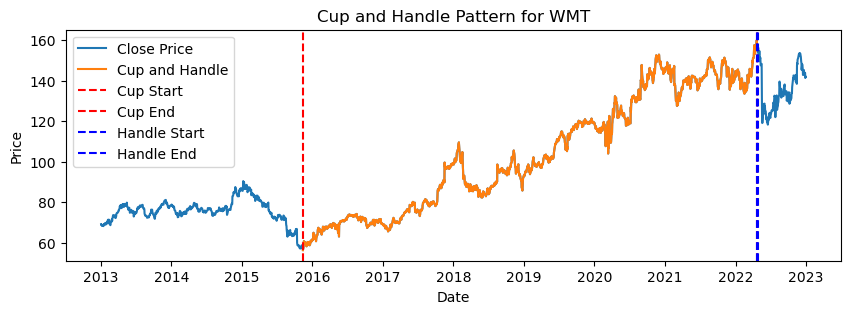

[*********************100%***********************]  1 of 1 completed


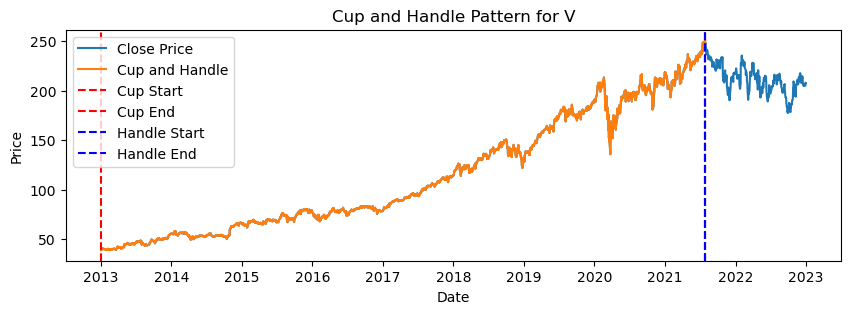

[*********************100%***********************]  1 of 1 completed


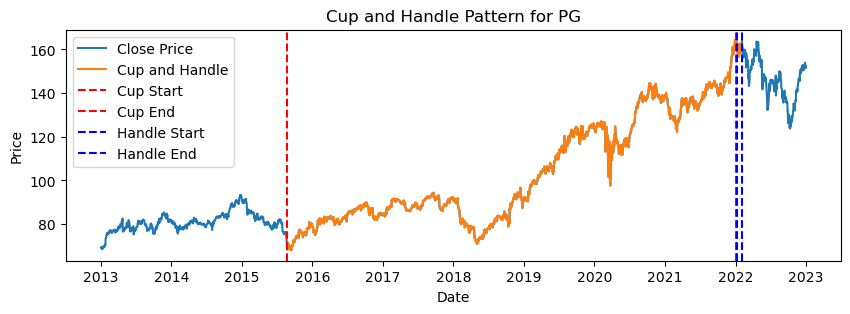

In [56]:
for symbol in stocks:
    stock = yf.download(symbol, start='2013-01-01', end='2023-01-01')
    stock = stock.reset_index()
    stock_dataframes[symbol] = stock
    plot_cup_and_handle(symbol, stock_dataframes[symbol])

# Head and Shoulder

#### The head and shoulders chart pattern is a reversal pattern observed in technical analysis of stock charts. It is considered a reliable indicator of a trend reversal from bullish to bearish. The pattern resembles the shape of a head and two shoulders and consists of three main components: the left shoulder, the head, and the right shoulder.
#### Below the function calculates the indices that mark the boundaries of the left shoulder, head, and right shoulder. It does this by finding the minimum low price for the left shoulder, the maximum high price after the left shoulder for the head, and the minimum low price after the head for the right shoulder. These boundaries help define the shape of the head and shoulders pattern.

In [57]:
def plot_head_and_shoulders(symbol, stock_dataframe):
    # Extract necessary columns from the stock dataframe
    dates = stock_dataframe['Date']
    high_prices = stock_dataframe['High']
    low_prices = stock_dataframe['Low']
    close_prices = stock_dataframe['Close']

    # Calculate the head and shoulders boundaries
    left_shoulder_start = low_prices.idxmin()
    head_start = high_prices[left_shoulder_start:].idxmax()
    right_shoulder_start = high_prices[head_start:].idxmin()
    right_shoulder_end = close_prices[right_shoulder_start:].idxmin()

    # Plot the stock price data
    plt.figure(figsize=(10, 3))
    plt.plot(dates, close_prices, label='Close Price')
    plt.plot(dates[left_shoulder_start:right_shoulder_end], close_prices[left_shoulder_start:right_shoulder_end], label='Head and Shoulders')

    # Plot head and shoulders boundaries
    plt.axvline(x=dates[left_shoulder_start], color='r', linestyle='--', linewidth=1.5, label='Left Shoulder Start')
    plt.axvline(x=dates[head_start], color='r', linestyle='--', linewidth=1.5, label='Head Start')
    plt.axvline(x=dates[right_shoulder_start], color='r', linestyle='--', linewidth=1.5, label='Right Shoulder Start')
    plt.axvline(x=dates[right_shoulder_end], color='r', linestyle='--', linewidth=1.5, label='Right Shoulder End')

    plt.title(f'Head and Shoulders Pattern for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

[*********************100%***********************]  1 of 1 completed


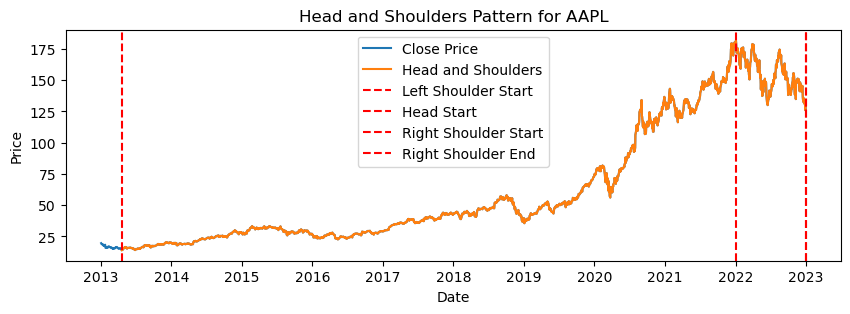

[*********************100%***********************]  1 of 1 completed


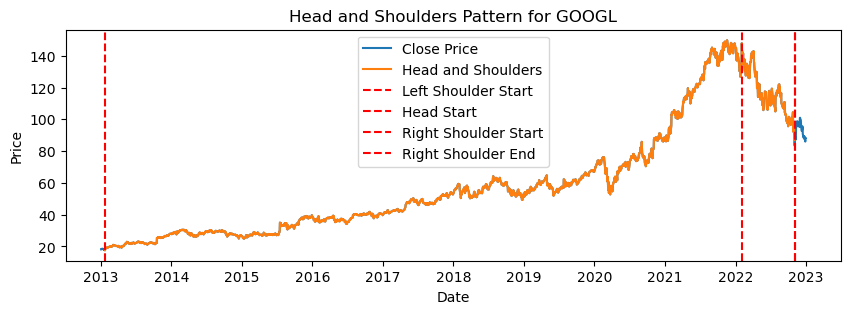

[*********************100%***********************]  1 of 1 completed


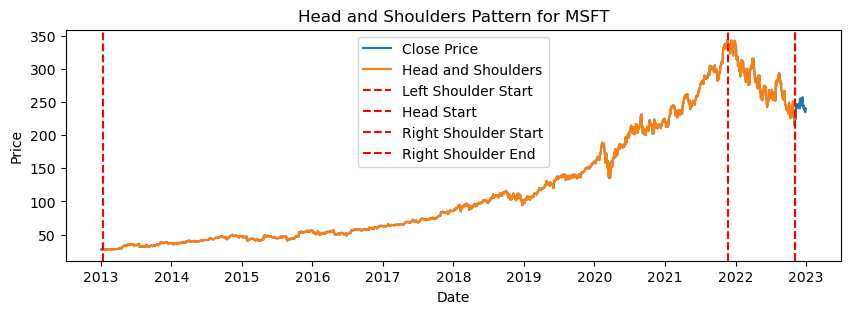

[*********************100%***********************]  1 of 1 completed


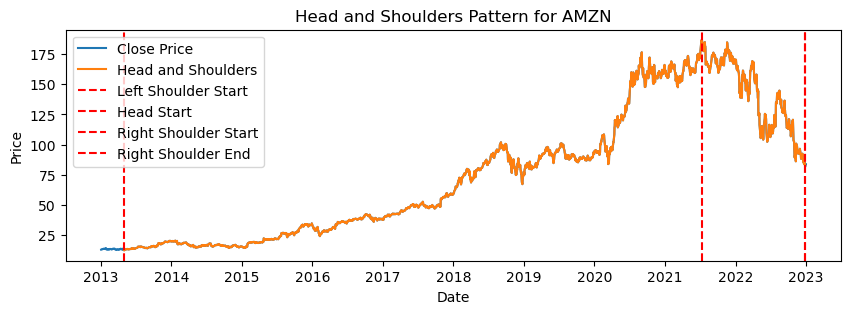

[*********************100%***********************]  1 of 1 completed


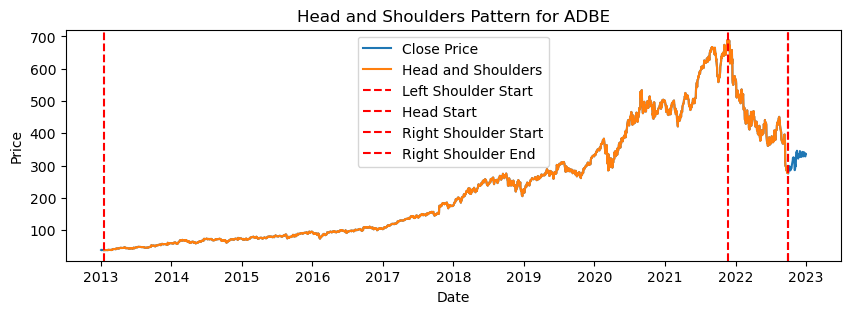

[*********************100%***********************]  1 of 1 completed


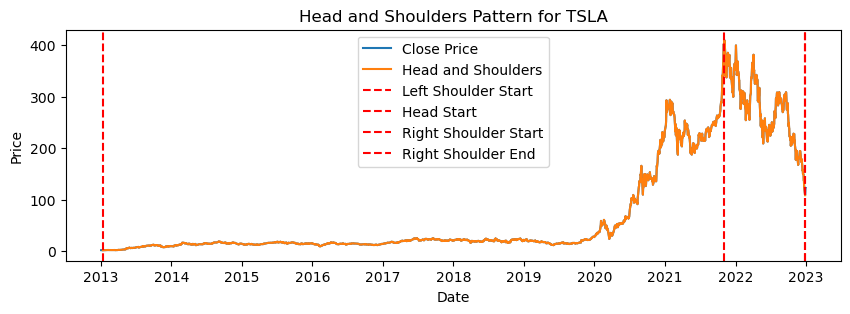

[*********************100%***********************]  1 of 1 completed


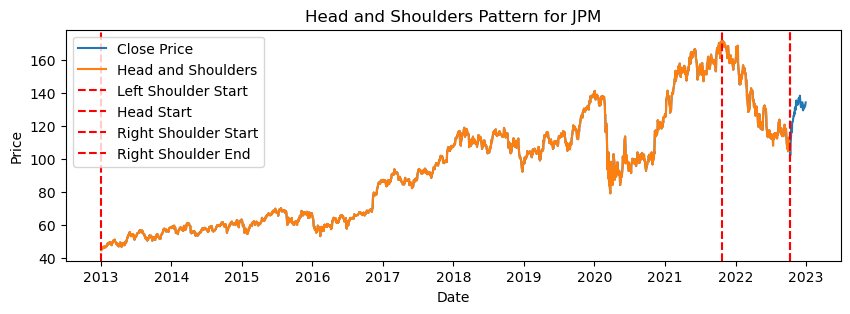

[*********************100%***********************]  1 of 1 completed


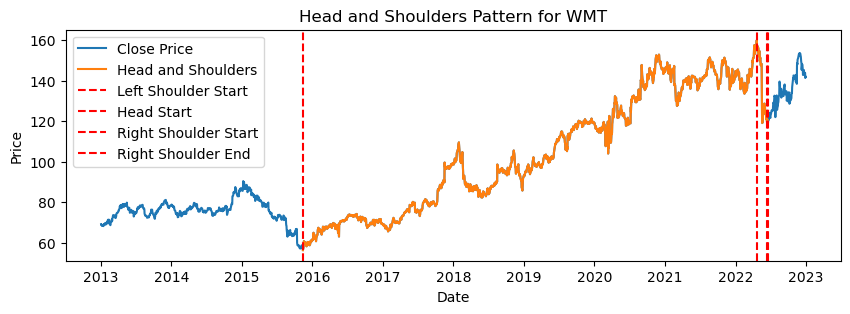

[*********************100%***********************]  1 of 1 completed


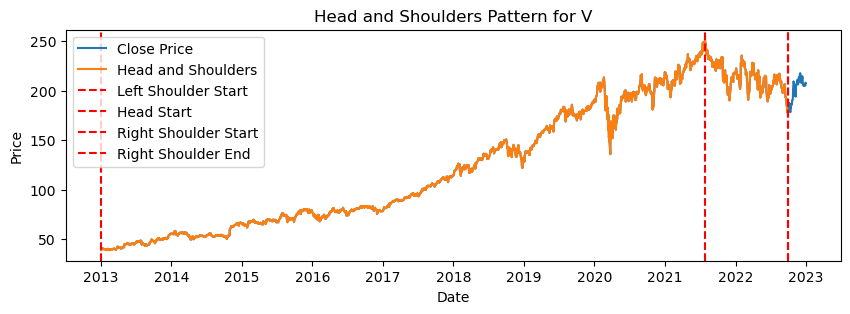

[*********************100%***********************]  1 of 1 completed


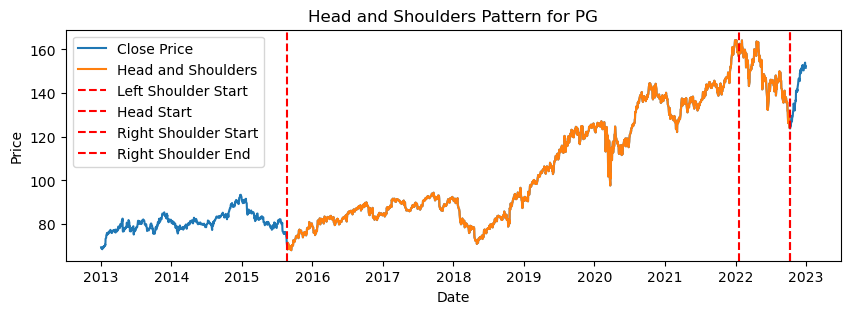

In [58]:
for symbol in stocks:
    stock = yf.download(symbol, start='2013-01-01', end='2023-01-01')
    stock = stock.reset_index()
    stock_dataframes[symbol] = stock
    plot_head_and_shoulders(symbol, stock_dataframes[symbol])

# Round Top

#### The round top chart pattern is a technical analysis pattern observed in stock charts. It typically signifies a transition from a bullish trend to a bearish trend. The pattern resembles a rounded curve or a "U" shape and consists of a gradual upward movement followed by a consolidation phase and a subsequent decline.
#### Below the function identifies the high points in the stock's price series using a condition that compares the current price to the previous and next prices. It looks for instances where the price is higher than both the previous and next prices, indicating a local peak. From these high points, it determines the index of the start of the round top pattern and the index of the subsequent price minimum.

In [59]:
def plot_round_top(symbol, stock_dataframe):
    # Extract necessary columns from the stock dataframe
    dates = stock_dataframe['Date']
    high_prices = stock_dataframe['High']
    low_prices = stock_dataframe['Low']
    close_prices = stock_dataframe['Close']

    # Calculate the round top boundaries
    high_points = high_prices[(high_prices.shift(1) < high_prices) & (high_prices.shift(-1) < high_prices)]
    round_top_start = high_points.idxmax()
    round_top_end = close_prices[round_top_start:].idxmin()

    # Plot the stock price data
    plt.figure(figsize=(10, 3))
    plt.plot(dates, close_prices, label='Close Price')
    plt.plot(dates[round_top_start:round_top_end], close_prices[round_top_start:round_top_end], label='Round Top')

    # Plot round top boundaries
    plt.axvline(x=dates[round_top_start], color='r', linestyle='--', linewidth=1.5, label='Round Top Start')
    plt.axvline(x=dates[round_top_end], color='r', linestyle='--', linewidth=1.5, label='Round Top End')

    plt.title(f'Round Top Pattern for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

[*********************100%***********************]  1 of 1 completed


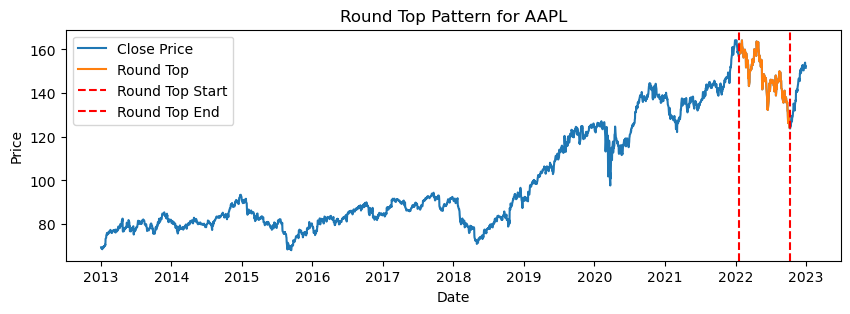

[*********************100%***********************]  1 of 1 completed


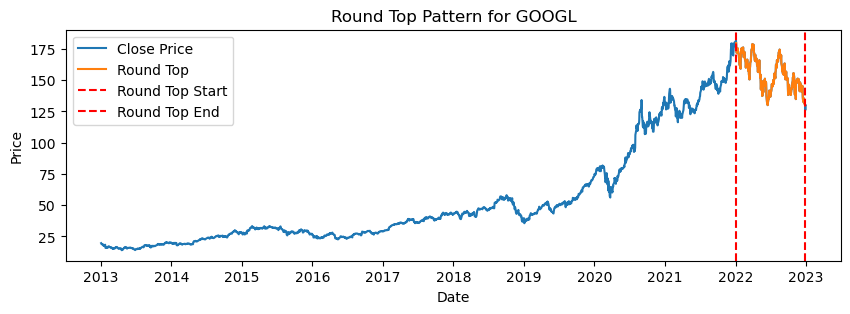

[*********************100%***********************]  1 of 1 completed


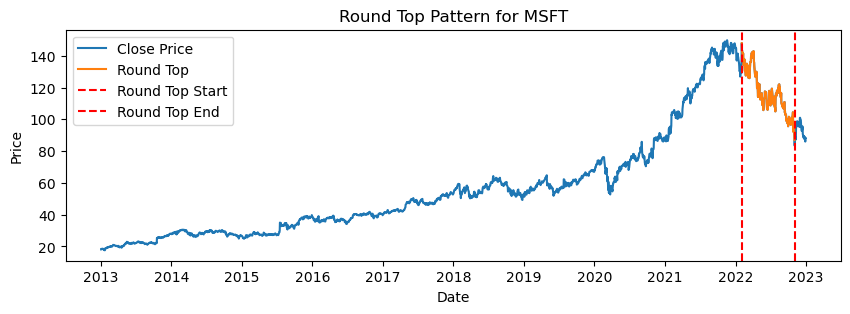

[*********************100%***********************]  1 of 1 completed


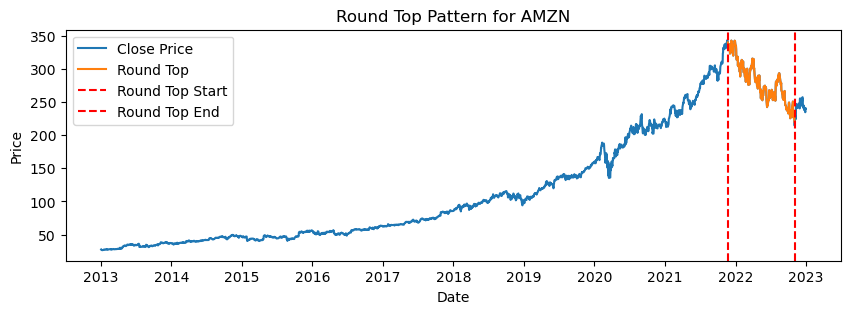

[*********************100%***********************]  1 of 1 completed


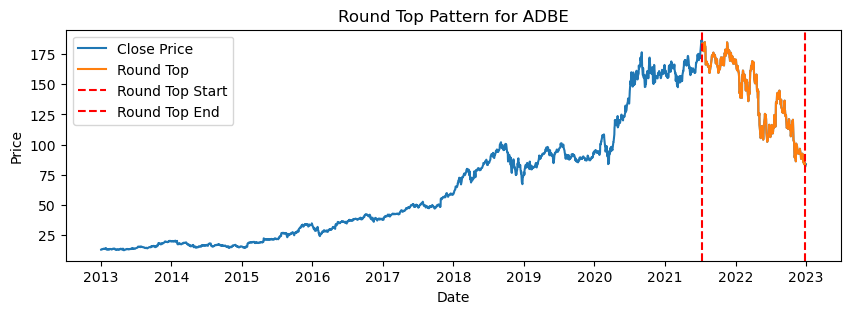

[*********************100%***********************]  1 of 1 completed


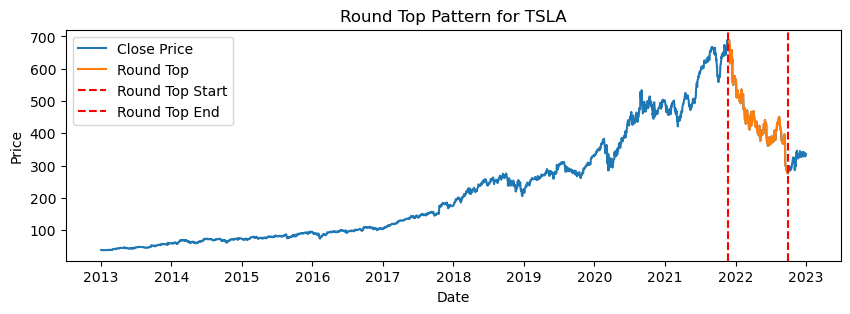

[*********************100%***********************]  1 of 1 completed


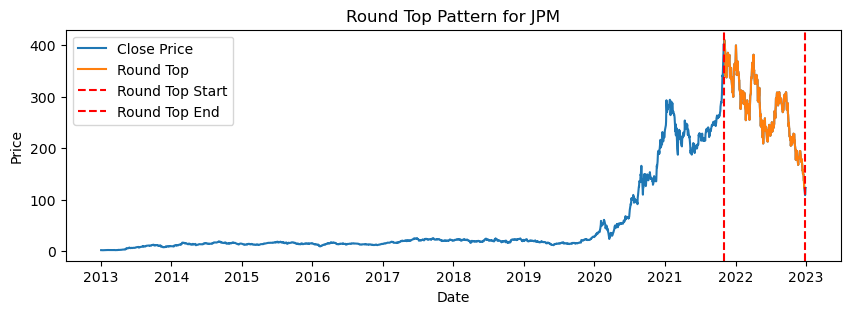

[*********************100%***********************]  1 of 1 completed


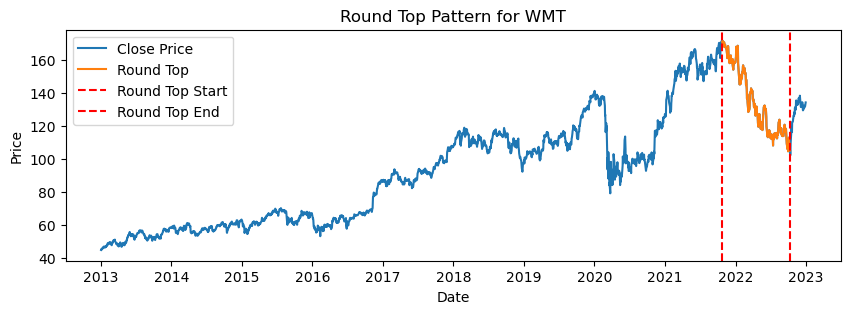

[*********************100%***********************]  1 of 1 completed


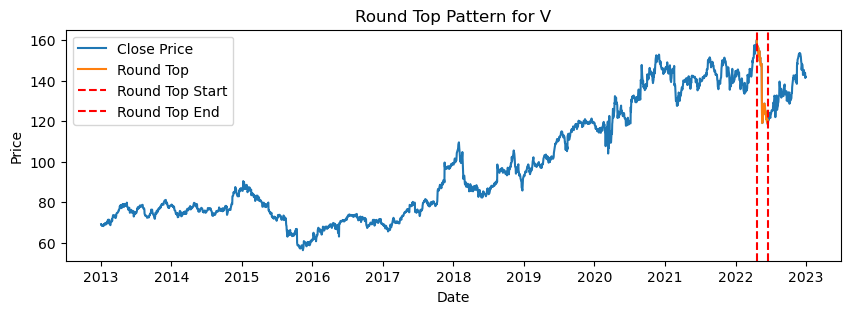

[*********************100%***********************]  1 of 1 completed


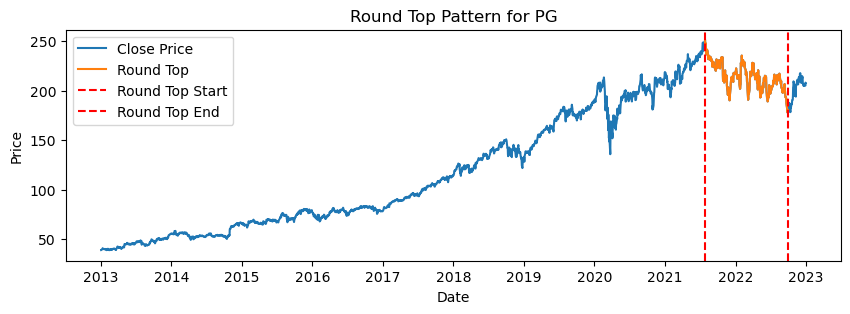

In [60]:
for symbol in stocks:
    stock_dataframes[symbol] = stock
    stock = yf.download(symbol, start='2013-01-01', end='2023-01-01')
    stock = stock.reset_index()
    plot_round_top(symbol, stock_dataframes[symbol])